<a href="https://colab.research.google.com/github/DanishJameel/Open_source/blob/main/Project_binary_logit_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


In [2]:
data = pd.read_csv('/content/517713700_commute_binary_55062858495454.csv')


In [3]:
data

,id,mode,time.car,cost.car,time.bus,cost.bus,price_gas,snowfall,construction,bus_detour,age,income,marital_status
0,1,car,13,0.79,26,0,2.44,0.0,0,1,33,28,married
1,2,car,9,0.59,14,0,2.59,0.0,0,0,25,28,single
2,3,bus,20,1.62,35,0,2.55,1.0,0,0,27,23,single
3,4,bus,11,0.30,11,0,2.53,2.2,0,0,25,21,single
4,5,bus,12,0.44,15,0,2.49,11.2,0,0,26,26,married
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,bus,11,0.40,15,0,2.42,0.0,0,0,27,22,single
996,997,bus,9,0.56,16,0,2.42,0.0,0,0,28,24,single
997,998,bus,15,0.39,12,0,2.54,1.1,1,0,29,25,single
998,999,bus,14,0.32,11,0,2.52,3.6,1,0,28,25,single


In [4]:
data.isnull().sum()


id                0
mode              0
time.car          0
cost.car          0
time.bus          0
cost.bus          0
price_gas         0
snowfall          0
construction      0
bus_detour        0
age               0
income            0
marital_status    0
dtype: int64

In [5]:
data.dropna(inplace=True)


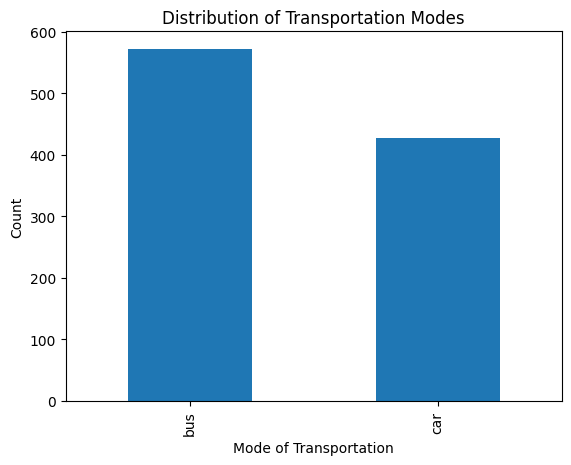

In [6]:
import matplotlib.pyplot as plt

data['mode'].value_counts().plot(kind='bar')
plt.xlabel('Mode of Transportation')
plt.ylabel('Count')
plt.title('Distribution of Transportation Modes')
plt.show()


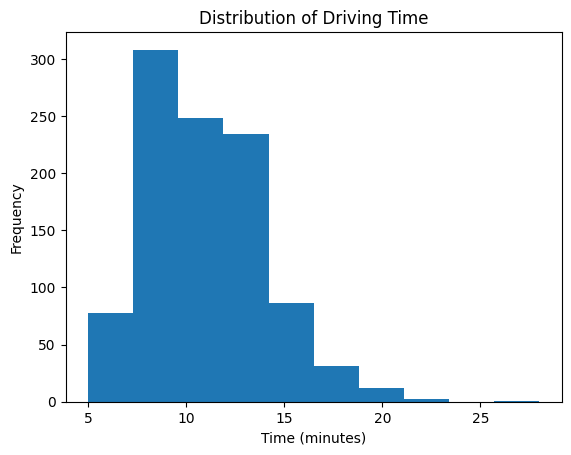

In [7]:
plt.hist(data['time.car'], bins=10)
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Driving Time')
plt.show()


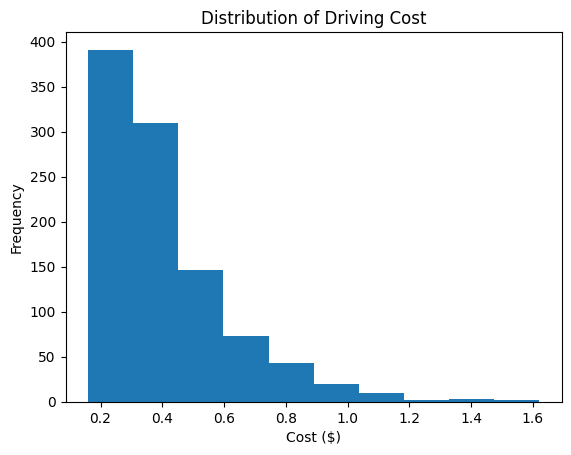

In [8]:
plt.hist(data['cost.car'], bins=10)
plt.xlabel('Cost ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Driving Cost')
plt.show()


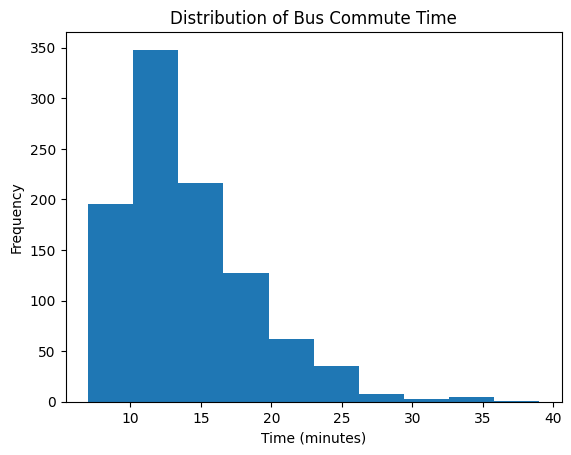

In [9]:
plt.hist(data['time.bus'], bins=10)
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Bus Commute Time')
plt.show()


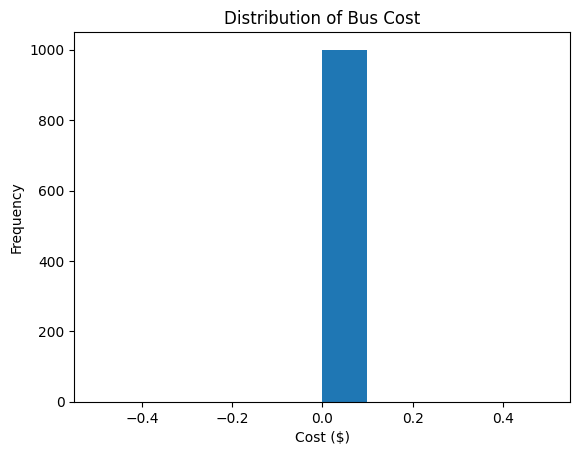

In [10]:
plt.hist(data['cost.bus'], bins=10)
plt.xlabel('Cost ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Bus Cost')
plt.show()


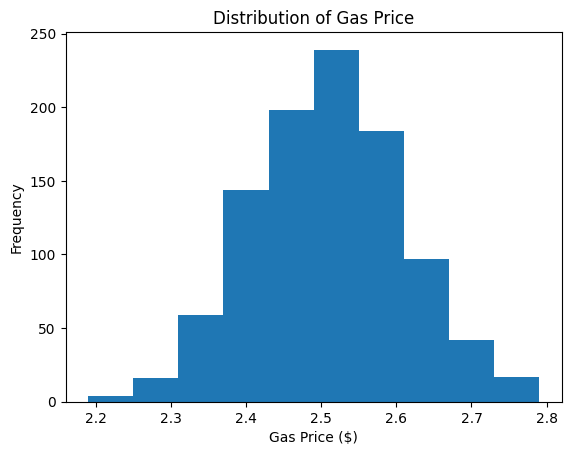

count    1000.000000
mean        2.503720
std         0.099091
min         2.190000
25%         2.440000
50%         2.500000
75%         2.570000
max         2.790000
Name: price_gas, dtype: float64


In [11]:
plt.hist(data['price_gas'], bins=10)
plt.xlabel('Gas Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Gas Price')
plt.show()

# Alternatively, you can use summary statistics:
print(data['price_gas'].describe())


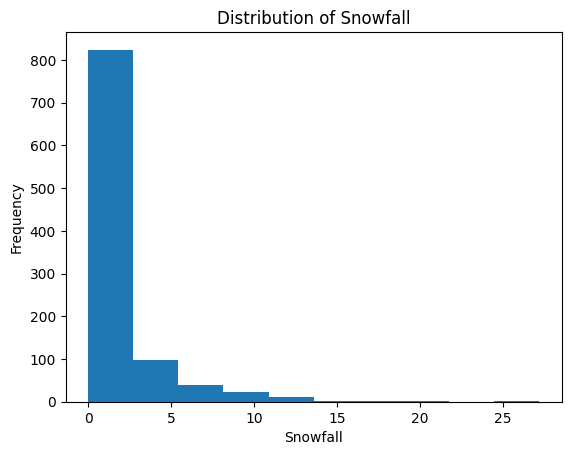

count    1000.000000
mean        1.335700
std         2.763225
min         0.000000
25%         0.000000
50%         0.000000
75%         1.400000
max        27.200000
Name: snowfall, dtype: float64


In [12]:
plt.hist(data['snowfall'], bins=10)
plt.xlabel('Snowfall')
plt.ylabel('Frequency')
plt.title('Distribution of Snowfall')
plt.show()

# Alternatively, you can use summary statistics:
print(data['snowfall'].describe())


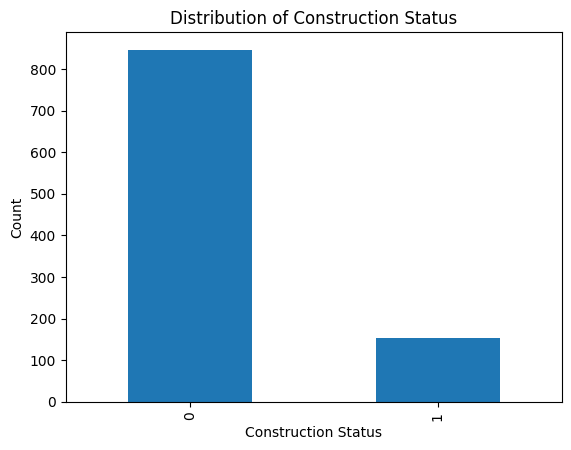

In [13]:
data['construction'].value_counts().plot(kind='bar')
plt.xlabel('Construction Status')
plt.ylabel('Count')
plt.title('Distribution of Construction Status')
plt.show()


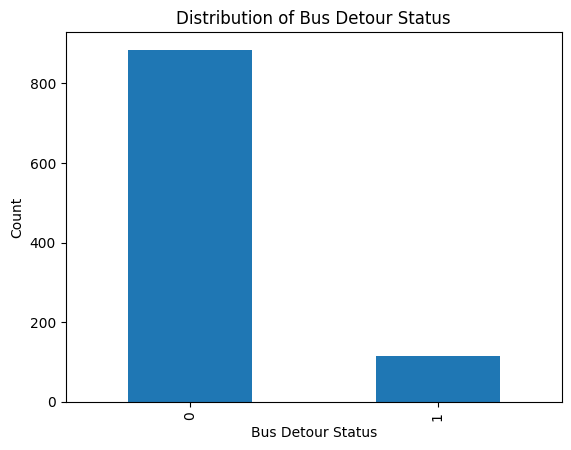

In [14]:
data['bus_detour'].value_counts().plot(kind='bar')
plt.xlabel('Bus Detour Status')
plt.ylabel('Count')
plt.title('Distribution of Bus Detour Status')
plt.show()


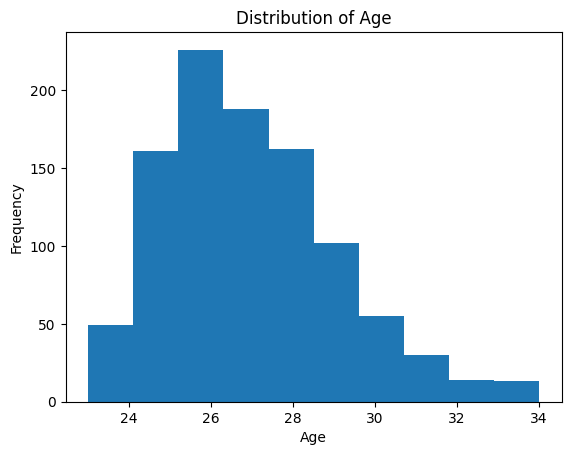

In [15]:
plt.hist(data['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

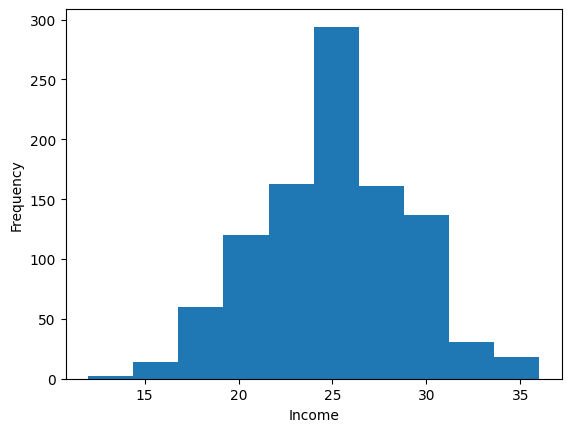

In [16]:
plt.hist(data['income'], bins=10)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt


In [17]:
data = pd.get_dummies(data, columns=['mode', 'marital_status'], drop_first=True)


In [18]:
data

,id,time.car,cost.car,time.bus,cost.bus,price_gas,snowfall,construction,bus_detour,age,income,mode_car,marital_status_single
0,1,13,0.79,26,0,2.44,0.0,0,1,33,28,1,0
1,2,9,0.59,14,0,2.59,0.0,0,0,25,28,1,1
2,3,20,1.62,35,0,2.55,1.0,0,0,27,23,0,1
3,4,11,0.30,11,0,2.53,2.2,0,0,25,21,0,1
4,5,12,0.44,15,0,2.49,11.2,0,0,26,26,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,11,0.40,15,0,2.42,0.0,0,0,27,22,0,1
996,997,9,0.56,16,0,2.42,0.0,0,0,28,24,0,1
997,998,15,0.39,12,0,2.54,1.1,1,0,29,25,0,1
998,999,14,0.32,11,0,2.52,3.6,1,0,28,25,0,1


In [19]:
X = data[['cost.car', 'time.car', 'time.bus']]
y = data['mode_car']


In [20]:
X = sm.add_constant(X)  # Add a constant term to the model
logit_model = sm.Logit(y, X)
result = logit_model.fit()


Optimization terminated successfully.
         Current function value: inf
         Iterations 6


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [21]:
print(result.summary())


                           Logit Regression Results                           
Dep. Variable:               mode_car   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Sun, 07 May 2023   Pseudo R-squ.:                     inf
Time:                        04:55:16   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2333      0.347      6.443      0.000       1.554       2.913
cost.car      -2.0772      0.732     -2.836      0.005      -3.513      -0.642
time.car      -0.3322      0.035     -9.400      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [22]:
marginal_effects = result.get_margeff()
print(marginal_effects.summary())


        Logit Marginal Effects       
Dep. Variable:               mode_car
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cost.car      -0.4314      0.150     -2.879      0.004      -0.725      -0.138
time.car      -0.0690      0.006    -11.329      0.000      -0.081      -0.057
time.bus       0.0275      0.007      4.222      0.000       0.015       0.040


In [23]:
# Assuming cost.car is the cost per hour spent driving and time.car is the time in hours spent driving
dollar_value_driving = result.params['cost.car']  # Coefficient for cost.car

# Assuming cost.bus is the cost per hour spent on the bus and time.bus is the time in hours spent on the bus
dollar_value_bus = result.params['time.bus']  # Coefficient for cost.bus


In [24]:
X = data[['cost.car', 'time.car', 'time.bus', 'income']]
X = sm.add_constant(X)  # Add a constant term to the model
logit_model_income = sm.Logit(y, X)
result_income = logit_model_income.fit()


Optimization terminated successfully.
         Current function value: inf
         Iterations 6


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [25]:
print(result_income.summary())


                           Logit Regression Results                           
Dep. Variable:               mode_car   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            4
Date:                Sun, 07 May 2023   Pseudo R-squ.:                     inf
Time:                        04:55:16   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0511      0.538      1.954      0.051      -0.003       2.105
cost.car      -2.0279      0.733     -2.765      0.006      -3.465      -0.591
time.car      -0.3416      0.036     -9.553      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [26]:
income_levels = [15000, 25000, 35000]

for income in income_levels:
    income_effect = result_income.params['income'] / income  # Coefficient for income
    dollar_value_driving_income = result_income.params['cost.car'] / income  # Coefficient for cost.car
    dollar_value_bus_income = result_income.params['time.bus'] / income  # Coefficient for cost.bus
    
    print(f"For an income of {income}:")
    print(f"Marginal utility of income: {income_effect}")
    print(f"Dollar value of driving per hour: {dollar_value_driving_income}")
    print(f"Dollar value of bus per hour: {dollar_value_bus_income}")


For an income of 15000:
Marginal utility of income: 3.348608126608297e-06
Dollar value of driving per hour: -0.00013519149947561172
Dollar value of bus per hour: 8.858822963488404e-06
For an income of 25000:
Marginal utility of income: 2.0091648759649784e-06
Dollar value of driving per hour: -8.111489968536704e-05
Dollar value of bus per hour: 5.315293778093043e-06
For an income of 35000:
Marginal utility of income: 1.435117768546413e-06
Dollar value of driving per hour: -5.793921406097646e-05
Dollar value of bus per hour: 3.7966384129236024e-06


In [27]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


In [32]:
X = data[['cost.car', 'time.car', 'time.bus', 'income']]
y = data['mode_car']


In [33]:
X = sm.add_constant(X)  # Add a constant term to the model
mlogit_model = sm.MNLogit(y, X)
result = mlogit_model.fit()


Optimization terminated successfully.
         Current function value: 0.596392
         Iterations 6


In [34]:
marginal_effects = result.get_margeff()
print(marginal_effects.summary())


       MNLogit Marginal Effects      
Dep. Variable:               mode_car
Method:                          dydx
At:                           overall
mode_car=0      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cost.car       0.4177      0.149      2.805      0.005       0.126       0.710
time.car       0.0704      0.006     11.598      0.000       0.058       0.082
time.bus      -0.0274      0.006     -4.226      0.000      -0.040      -0.015
income        -0.0103      0.004     -2.881      0.004      -0.017      -0.003
------------------------------------------------------------------------------
mode_car=1      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cost.car      -0.4177      0.149     -2.805      0.005      -0.710      -0.126
time.car      -0.0704      0.006    -11.598      0.000    

In [35]:
marginal_effects = result.get_margeff()
print(marginal_effects.summary())


       MNLogit Marginal Effects      
Dep. Variable:               mode_car
Method:                          dydx
At:                           overall
mode_car=0      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cost.car       0.4177      0.149      2.805      0.005       0.126       0.710
time.car       0.0704      0.006     11.598      0.000       0.058       0.082
time.bus      -0.0274      0.006     -4.226      0.000      -0.040      -0.015
income        -0.0103      0.004     -2.881      0.004      -0.017      -0.003
------------------------------------------------------------------------------
mode_car=1      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cost.car      -0.4177      0.149     -2.805      0.005      -0.710      -0.126
time.car      -0.0704      0.006    -11.598      0.000    